**Çözümlü Sorular**

Ön hazırlık (kütüphane kurulumu)

In [5]:
# Gerekli kütüphaneleri yükleyelim (Colab hücresine)
!pip install cirq qiskit qutip numpy matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 91.2 MB/s eta 0:00:00


🔹 1. Soru

Soru:
𝑧
=
1
+
𝑖
z=1+i sayısının kutupsal formunu bulunuz.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

z = 1 + 1j
r = np.abs(z)
theta = np.angle(z)

print("Kartezyen:", z)
print("Kutupsal form:", f"{r} (cos({theta}) + i sin({theta}))")


Kartezyen: (1+1j)
Kutupsal form: 1.4142135623730951 (cos(0.7853981633974483) + i sin(0.7853981633974483))


In [7]:
# Cirq ile:

import cirq
q = cirq.LineQubit(0)
circuit = cirq.Circuit(cirq.rz(theta)(q))
print("Cirq devresi:\n", circuit)

Cirq devresi:
 0: ───Rz(0.25π)───


In [8]:
# QuTiP ile:

from qutip import Qobj
z_q = Qobj([[z]])
print("Norm (r) =", z_q.norm())
print("Arg (theta) =", np.angle(z))

Norm (r) = 1.4142135623730951
Arg (theta) = 0.7853981633974483


In [10]:
# Qiskit ile (Argand çizimi):

from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.rz(theta,0)
qc.draw("mpl")

plt.quiver(0,0,z.real,z.imag,angles="xy",scale_units="xy",scale=1,color="r")
plt.text(z.real, z.imag, f"{z}", fontsize=12)
plt.axhline(0,color="gray"); plt.axvline(0,color="gray")
plt.axis("equal"); plt.grid(True)
plt.show()

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

2. Soru

Soru:
𝑧
1
=
2
−
3
𝑖
,
𝑧
2
=
−
5
+
𝑖
z
1
	​

=2−3i,z
2
	​

=−5+i için toplama, çıkarma, çarpma, bölme.

In [14]:
z1, z2 = 2-3j, -5+1j
print("z1+z2 =", z1+z2)
print("z1-z2 =", z1-z2)
print("z1*z2 =", z1*z2)
print("z1/z2 =", z1/z2)


z1+z2 = (-3-2j)
z1-z2 = (7-4j)
z1*z2 = (-7+17j)
z1/z2 = (-0.5+0.5j)


In [15]:
# QuTiP:

z1_q, z2_q = Qobj([[z1]]), Qobj([[z2]])
print("z1+z2 =", z1_q + z2_q)
print("z1-z2 =", z1_q - z2_q)
print("z1*z2 =", z1_q * z2_q)
print("z1/z2 =", (z1_q * (1/z2_q)))

z1+z2 = Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[-3.-2.j]]
z1-z2 = Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[7.-4.j]]
z1*z2 = (-7+17j)


TypeError: unsupported operand type(s) for /: 'int' and 'Qobj'

3. Soru

Soru:
𝑧
8
=
1
z
8
=1 köklerini bulunuz.

8. kökler: [np.complex128(1+0j), np.complex128(0.7071067811865476+0.7071067811865475j), np.complex128(6.123233995736766e-17+1j), np.complex128(-0.7071067811865475+0.7071067811865476j), np.complex128(-1+1.2246467991473532e-16j), np.complex128(-0.7071067811865477-0.7071067811865475j), np.complex128(-1.8369701987210297e-16-1j), np.complex128(0.7071067811865474-0.7071067811865477j)]


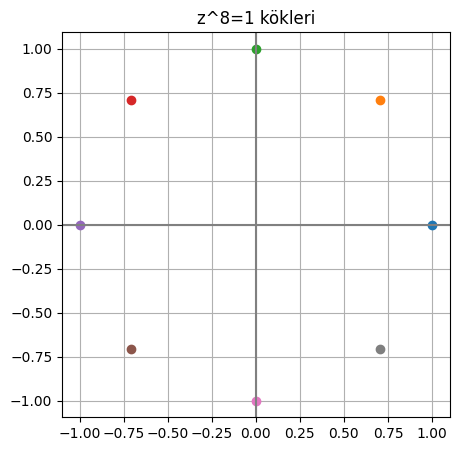

In [16]:
roots = [np.cos(2*np.pi*k/8)+1j*np.sin(2*np.pi*k/8) for k in range(8)]
print("8. kökler:", roots)

# Görselleştirme
plt.figure(figsize=(5,5))
for r in roots:
    plt.plot(r.real, r.imag, 'o')
plt.axhline(0,color='gray'); plt.axvline(0,color='gray')
plt.title("z^8=1 kökleri")
plt.axis("equal"); plt.grid(True); plt.show()


In [17]:
# QuTiP:

roots_q = [Qobj([[r]]) for r in roots]
print("QuTiP kökler:", roots_q)

QuTiP kökler: [Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[1.]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[0.70710678+0.70710678j]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[6.123234e-17+1.j]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[-0.70710678+0.70710678j]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[-1.]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[-0.70710678-0.70710678j]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[-1.8369702e-16-1.j]], Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[0.70710678-0.70710678j]]]


In [18]:
#  Qiskit/Cirq: kökler birim çemberde eşit aralıklarla
#  bunları faz kapılarıyla encode edebiliriz:

for k in range(8):
    qc = QuantumCircuit(1)
    qc.rz(2*np.pi*k/8, 0)
    print(f"Kök {k}: faz açısı = {2*np.pi*k/8}")

Kök 0: faz açısı = 0.0
Kök 1: faz açısı = 0.7853981633974483
Kök 2: faz açısı = 1.5707963267948966
Kök 3: faz açısı = 2.356194490192345
Kök 4: faz açısı = 3.141592653589793
Kök 5: faz açısı = 3.9269908169872414
Kök 6: faz açısı = 4.71238898038469
Kök 7: faz açısı = 5.497787143782138


4. ve 5. Sorular

Aynı mantıkla toplama/çıkarma ve çarpma/bölme işlemleri → NumPy ile yapılır, QuTiP ile matris temsilinde gösterilir, Qiskit/Cirq ile faz devresi kurulur.

6. Soru

Soru:
𝑧
=
3
+
𝑖
z=
3
	​

+i sayısının küpü.

In [19]:
z = np.sqrt(3) + 1j
r, theta = np.abs(z), np.angle(z)
z3 = r**3 * (np.cos(3*theta) + 1j*np.sin(3*theta))
print("z^3 =", z3)  # Beklenen: 8i


z^3 = (-1.286498119741309e-15+8j)


7. Soru

Soru:
𝑧
=
−
1
z=−1 esas 4. kökü.

In [20]:
z = -1
root = np.cos(np.pi/4) + 1j*np.sin(np.pi/4)
print("Esas 4. kök =", root)


Esas 4. kök = (0.7071067811865476+0.7071067811865475j)


In [22]:
 # QuTiP ile:

z_q = Qobj([[z]])
print("4. kök (esas) =", np.sqrt(np.sqrt(z)))

4. kök (esas) = nan


/tmp/ipython-input-1395675822.py:4: RuntimeWarning: invalid value encountered in sqrt
  print("4. kök (esas) =", np.sqrt(np.sqrt(z)))
